In [1]:
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client deepface opencv-python numpy pandas requests pillow

In [5]:
!pip install tf-keras


First 5 rows of the dataset:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0



Missing Values:
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64
Optimization terminated successfully.
         Current function value: 0.075476
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  800
Model:                          Logit   Df Residuals:                      794
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.8911
Time:                        22:59:40   Log-Likelihood:                -60.381
converged:                       True   LL-Null:                       -554.22
Covariance Typ

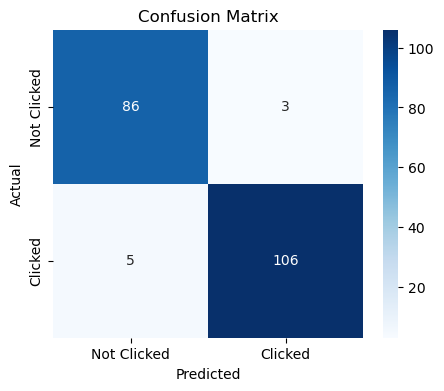


Enter the details for a new user:


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "dataset 2.csv"  # Change this to your actual file path
data = pd.read_csv(file_path)

# Display first few rows
print("First 5 rows of the dataset:")
display(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop irrelevant columns (e.g., 'Ad Topic Line', 'City', 'Country', 'Timestamp')
data = data.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp'])

# Convert categorical 'Male' column if not already encoded
if data['Male'].dtype == 'object':
    data['Male'] = LabelEncoder().fit_transform(data['Male'])

# Define features (X) and target variable (y)
X = data.drop(columns=['Clicked on Ad'])
y = data['Clicked on Ad']

# Add constant term for statsmodels regression
X = sm.add_constant(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model using statsmodels for regression summary
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print regression summary
print(result.summary())

# Train logistic regression model using scikit-learn for predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Function to predict if a new user will click on an ad
def predict_new_user():
    print("\nEnter the details for a new user:")
    daily_time_spent = float(input("Daily Time Spent on Site: "))
    age = int(input("Age: "))
    area_income = float(input("Area Income: "))
    daily_internet_usage = float(input("Daily Internet Usage: "))
    male = int(input("Male (1 for Male, 0 for Female): "))

    # Create DataFrame for user input
    new_user_data = pd.DataFrame([[1, daily_time_spent, age, area_income, daily_internet_usage, male]],
                                 columns=X.columns)

    # Scale input data
    new_user_scaled = scaler.transform(new_user_data)

    # Predict the outcome
    prediction = model.predict(new_user_scaled)
    probability = model.predict_proba(new_user_scaled)[:, 1]

    # Output result
    if prediction[0] == 1:
        print(f"\nPrediction: This person is likely to CLICK on the ad (Probability: {probability[0]:.2f})")
    else:
        print(f"\nPrediction: This person is NOT likely to click on the ad (Probability: {probability[0]:.2f})")

# Run the prediction function
predict_new_user()
